In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [0]:
#!wget https://www.weather.gov/source/hfo/events/Nov15tsunami/Hilodata.htm

In [0]:
#ls 


In [0]:
#mv Hilodata.htm "drive/My Drive/dsps/Homework 8"

In [5]:
cd "drive/My Drive/dsps/Homework 8"

/content/drive/My Drive/dsps/Homework 8


In [7]:
ls

Hilodata.htm         Hw8data.txt
Hilodata.htm.1       Statewide_Births__Deaths__Marriages__Civil_Unions_2012.csv
Hilodata.htm.1.gdoc


In [8]:
hilo06data = pd.read_csv("Hw8data.txt", delimiter= '\s+', skiprows=2, header = None, names = ["Date", "Time", "AHST", "predicted water level", "observed water level", "residual", "wnd speed", "wnd dir", "wnd gust", "bar pressure", "air temp", "water temp", "rel humidity"])

#making datetime column from spearted columns for read txt file
hilo06data['datetime'] = pd.to_datetime(hilo06data['Date'] + " " + hilo06data['Time'])

#reducing to necessary columns
hilo06data = hilo06data[['datetime', 'predicted water level', 'observed water level', 'residual']]

#creating dataframe for all predicted data
hiloPData = hilo06data[['datetime', 'predicted water level']]

#reducing to relevant rows
hilo06data = hilo06data[0:476]
hilo06data.head()


,datetime,predicted water level,observed water level,residual
0,2006-11-14 09:48:00,2.01,2.17,0.16
1,2006-11-14 09:54:00,2.03,2.17,0.14
2,2006-11-14 10:00:00,2.05,2.32,0.27
3,2006-11-14 10:06:00,2.06,2.20,0.14
4,2006-11-14 10:12:00,2.08,2.22,0.14


Text(0.5, -0.1, 'Figure 1: Plot of water levels in Hilo, Hawaii before, during, and after an earthquake of\nmagnitude 8.3 struck near the Kuril Islands at 01:14 on November 15th, 2006, which prompted\nthe Pacific Tsunami Warning Center to issue a Tsunami Watch for Hawaii. The actual (observed),\npredicted, and residual height data are plotted on a date/time axis, labeled according to the legend.\nMLLW (Mean Lower Low Water) represents the average hight of the lowest tide recorded\nat a tide station in Hilo.')

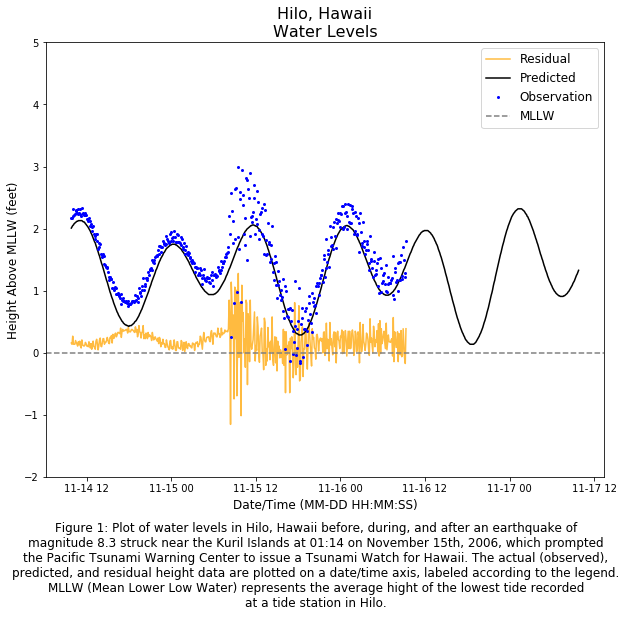

In [15]:
figure = pl.figure(figsize = (10,8))
#data plotted
pl.plot(hilo06data['datetime'], hilo06data['residual'], c = 'orange', alpha = .75, ms = 1)
pl.plot(hiloPData['datetime'], hiloPData['predicted water level'], '-', ms = 5, c = 'k')
pl.plot(hilo06data['datetime'], hilo06data['observed water level'],"o", c = 'blue', ms = 2)
pl.axhline(y = 0, c = 'grey', ls = '--')


#Chart elements
pl.ylim((-2,5))
pl.xlabel("Date/Time (MM-DD HH:MM:SS)", fontsize = 12)
pl.ylabel("Height Above MLLW (feet)", fontsize = 12)
pl.legend(['Residual','Predicted','Observation', 'MLLW'], fontsize = 12)
pl.title("Hilo, Hawaii\nWater Levels", fontsize = 16)

#figure Label
figlabel = "Figure 1: Plot of water levels in Hilo, Hawaii before, during, and after an earthquake of\nmagnitude 8.3 struck\
 near the Kuril Islands at 01:14 on November 15th, 2006, which prompted\nthe Pacific Tsunami Warning Center to issue a\
 Tsunami Watch for Hawaii. The actual (observed),\npredicted, and residual height data\
 are plotted on a date/time axis, labeled according to the legend.\nMLLW (Mean Lower Low Water) represents the average hight of the lowest tide\
 recorded\nat a tide station in Hilo."
pl.figtext(0.5, -.10, figlabel, ha = 'center', fontsize = 12) 

